In [102]:
### loading packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.inspection import permutation_importance
import shap


from mlxtend.plotting import plot_decision_regions

import math

In [103]:
#Import working_dataset 
X_train = pd.read_csv('/rds/general/user/md2620/home/ML_project/X_train.csv')

In [104]:
X_train.shape

(8002, 113)

In [105]:
X_train.head(5)

,Unnamed: 0,LBDSALSI,LBXSATSI,LBXSASSI,LBXSAPSI,LBDSBUSI,LBDSCASI,LBDSCHSI,LBXSC3SI,LBDSCRSI,...,PAQ620,PAQ635,PAQ650,PAQ665,SLQ050,SLQ060,SMQ020,SMD100BR,SMD410,SMQ680
0,58640.0,9.691139e-01,-0.308545,0.026750,-0.545771,3.434071e-01,1.836622e-01,-2.160481e-02,-6.898926e-01,2.696508e-01,...,Yes,No,No,No,No,No,Yes,NaN,No,No
1,71717.0,-4.619780e-01,-0.479643,-0.708059,-0.566575,-8.001147e-01,-1.561095e-01,-8.152819e-02,1.598887e+00,-5.395014e-01,...,No,No,No,No,No,No,Yes,NEWPORT,Yes,Yes
2,80552.0,2.535680e-01,-0.992937,-0.708059,-1.024264,5.733892e-01,-4.958812e-01,6.828027e-02,-1.176976e-01,1.301636e-01,...,No,No,No,Yes,No,No,No,NaN,No,No
3,55159.0,-2.542130e-15,0.000000,0.000000,0.000000,-3.858340e-14,3.017779e-14,-1.023513e-15,2.032845e-15,3.587752e-15,...,No,No,No,No,No,No,No,NaN,No,No
4,54023.0,6.113409e-01,0.290297,1.286424,-0.254515,-1.165570e-01,8.632057e-01,-1.392928e+00,1.026692e+00,1.301636e-01,...,No,No,Yes,Yes,No,No,No,NaN,No,No


In [106]:
X_train.rename(columns = {'Unnamed: 0':'SEQN'}, inplace = True)

In [107]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8002 entries, 0 to 8001
Columns: 113 entries, SEQN to SMQ680
dtypes: float64(46), object(67)
memory usage: 6.9+ MB


In [108]:
X_train.head()

,SEQN,LBDSALSI,LBXSATSI,LBXSASSI,LBXSAPSI,LBDSBUSI,LBDSCASI,LBDSCHSI,LBXSC3SI,LBDSCRSI,...,PAQ620,PAQ635,PAQ650,PAQ665,SLQ050,SLQ060,SMQ020,SMD100BR,SMD410,SMQ680
0,58640.0,9.691139e-01,-0.308545,0.026750,-0.545771,3.434071e-01,1.836622e-01,-2.160481e-02,-6.898926e-01,2.696508e-01,...,Yes,No,No,No,No,No,Yes,NaN,No,No
1,71717.0,-4.619780e-01,-0.479643,-0.708059,-0.566575,-8.001147e-01,-1.561095e-01,-8.152819e-02,1.598887e+00,-5.395014e-01,...,No,No,No,No,No,No,Yes,NEWPORT,Yes,Yes
2,80552.0,2.535680e-01,-0.992937,-0.708059,-1.024264,5.733892e-01,-4.958812e-01,6.828027e-02,-1.176976e-01,1.301636e-01,...,No,No,No,Yes,No,No,No,NaN,No,No
3,55159.0,-2.542130e-15,0.000000,0.000000,0.000000,-3.858340e-14,3.017779e-14,-1.023513e-15,2.032845e-15,3.587752e-15,...,No,No,No,No,No,No,No,NaN,No,No
4,54023.0,6.113409e-01,0.290297,1.286424,-0.254515,-1.165570e-01,8.632057e-01,-1.392928e+00,1.026692e+00,1.301636e-01,...,No,No,Yes,Yes,No,No,No,NaN,No,No


REMOVE VARIABLES WITH VERY CLOSE MEANING TO OTHERS

In [109]:
#Drop the variables you specify above from both X_train and X_test. Drop SEQN as well so it does not impact models' prediction
X_train.drop(['DBQ197','PEASCST1','BPXPULS','BMXWT','BMXHT','BMXLEG','BMXARML','BMXARMC','BMXWAIST','BMXTRI','MCQ010'], axis =1, inplace = True)

In [110]:
X_train.head(5)

,SEQN,LBDSALSI,LBXSATSI,LBXSASSI,LBXSAPSI,LBDSBUSI,LBDSCASI,LBDSCHSI,LBXSC3SI,LBDSCRSI,...,PAQ620,PAQ635,PAQ650,PAQ665,SLQ050,SLQ060,SMQ020,SMD100BR,SMD410,SMQ680
0,58640.0,9.691139e-01,-0.308545,0.026750,-0.545771,3.434071e-01,1.836622e-01,-2.160481e-02,-6.898926e-01,2.696508e-01,...,Yes,No,No,No,No,No,Yes,NaN,No,No
1,71717.0,-4.619780e-01,-0.479643,-0.708059,-0.566575,-8.001147e-01,-1.561095e-01,-8.152819e-02,1.598887e+00,-5.395014e-01,...,No,No,No,No,No,No,Yes,NEWPORT,Yes,Yes
2,80552.0,2.535680e-01,-0.992937,-0.708059,-1.024264,5.733892e-01,-4.958812e-01,6.828027e-02,-1.176976e-01,1.301636e-01,...,No,No,No,Yes,No,No,No,NaN,No,No
3,55159.0,-2.542130e-15,0.000000,0.000000,0.000000,-3.858340e-14,3.017779e-14,-1.023513e-15,2.032845e-15,3.587752e-15,...,No,No,No,No,No,No,No,NaN,No,No
4,54023.0,6.113409e-01,0.290297,1.286424,-0.254515,-1.165570e-01,8.632057e-01,-1.392928e+00,1.026692e+00,1.301636e-01,...,No,No,Yes,Yes,No,No,No,NaN,No,No


In [111]:
#Load test set
X_test = pd.read_csv('/rds/general/user/md2620/home/ML_project/X_test.csv')

In [112]:
X_test.shape

(2668, 113)

In [113]:
X_test.rename(columns = {'Unnamed: 0':'SEQN'}, inplace = True)

In [114]:
X_test.head(5)

,SEQN,LBDSALSI,LBXSATSI,LBXSASSI,LBXSAPSI,LBDSBUSI,LBDSCASI,LBDSCHSI,LBXSC3SI,LBDSCRSI,...,PAQ620,PAQ635,PAQ650,PAQ665,SLQ050,SLQ060,SMQ020,SMD100BR,SMD410,SMQ680
0,52184.0,0.253568,-0.479643,-0.918005,-0.462555,1.256947,0.863206,1.587108,-0.689893,0.409138,...,Yes,No,No,No,No,Yes,Yes,NaN,No,No
1,51940.0,1.326887,0.461395,-0.393141,-0.816223,0.343407,-0.835653,1.319757,0.454497,0.297422,...,No,No,No,No,No,No,No,NaN,No,No
2,64135.0,-0.104205,-0.736290,-0.078222,-1.149088,0.573389,0.523434,-1.451699,-0.689893,0.185706,...,No,No,Yes,No,No,No,No,NaN,No,No
3,61327.0,-2.250843,0.033651,0.341669,-0.816223,-1.253690,1.202977,-0.915846,1.598887,-0.957963,...,Yes,No,No,No,Yes,No,No,NaN,No,No
4,51822.0,-1.893070,0.632493,-0.288168,-0.462555,0.343407,-0.835653,0.097090,-1.834283,-0.148811,...,No,No,No,Yes,No,No,Yes,NATURAL AMERICAN SPIRIT,Yes,Yes


In [115]:
#Drop the variables you specify above from both X_train and X_test. Drop SEQN as well so it does not impact models' prediction
X_test.drop(['DBQ197','PEASCST1','BPXPULS','BMXWT','BMXHT','BMXLEG','BMXARML','BMXARMC','BMXWAIST','BMXTRI','MCQ010'], axis =1, inplace = True)

In [116]:
X_test.head(5)

,SEQN,LBDSALSI,LBXSATSI,LBXSASSI,LBXSAPSI,LBDSBUSI,LBDSCASI,LBDSCHSI,LBXSC3SI,LBDSCRSI,...,PAQ620,PAQ635,PAQ650,PAQ665,SLQ050,SLQ060,SMQ020,SMD100BR,SMD410,SMQ680
0,52184.0,0.253568,-0.479643,-0.918005,-0.462555,1.256947,0.863206,1.587108,-0.689893,0.409138,...,Yes,No,No,No,No,Yes,Yes,NaN,No,No
1,51940.0,1.326887,0.461395,-0.393141,-0.816223,0.343407,-0.835653,1.319757,0.454497,0.297422,...,No,No,No,No,No,No,No,NaN,No,No
2,64135.0,-0.104205,-0.736290,-0.078222,-1.149088,0.573389,0.523434,-1.451699,-0.689893,0.185706,...,No,No,Yes,No,No,No,No,NaN,No,No
3,61327.0,-2.250843,0.033651,0.341669,-0.816223,-1.253690,1.202977,-0.915846,1.598887,-0.957963,...,Yes,No,No,No,Yes,No,No,NaN,No,No
4,51822.0,-1.893070,0.632493,-0.288168,-0.462555,0.343407,-0.835653,0.097090,-1.834283,-0.148811,...,No,No,No,Yes,No,No,Yes,NATURAL AMERICAN SPIRIT,Yes,Yes


SPLIT X_TRAIN AND X_TEST INTO NUMERICAL AND CATEGORICAL DATAFRAMES

In [117]:
#Split X_train into two dataframes - one with only numerical variables and the other one with only categorical variables.
X_train_numerical = X_train.select_dtypes(include='float64')
X_train_categorical = X_train.select_dtypes(include='object')
X_test_numerical = X_test.select_dtypes(include='float64')
X_test_categorical = X_test.select_dtypes(include='object')

In [118]:
#Look for NAs in each of the 4th dataframes before imputation - numerical variables have already been imputed and standardized
print(X_train_numerical.isnull().sum().sum())
print(X_train_categorical.isnull().sum().sum())
print(X_test_numerical.isnull().sum().sum())
print(X_test_categorical.isnull().sum().sum())

0
7092
0
2348


In [119]:
#Constant impute for categorical variables
from sklearn.impute import SimpleImputer
# Creating an imputer object that looks for 'Nan' values, then replaces them with missing_value for categorical variables
miss_constant_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent', copy=False)
X_train_categorical = pd.DataFrame(miss_constant_imputer.fit_transform(X_train_categorical),index = X_train_categorical.index.values, columns=X_train_categorical.columns)

In [120]:
#Constant impute for categorical variables
from sklearn.impute import SimpleImputer
# Creating an imputer object that looks for 'Nan' values, then replaces them with missing_value for categorical variables
miss_constant_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent', copy=False)
X_test_categorical = pd.DataFrame(miss_constant_imputer.fit_transform(X_test_categorical),index = X_test_categorical.index.values, columns=X_test_categorical.columns)

In [121]:
#Check number of NAs in X_train_categorical & X_test_categorical after imputation
print(X_train_categorical.isnull().sum().sum())
print(X_test_categorical.isnull().sum().sum())

0
0


RECONCILE CATEGORICAL AND NUMERICAL DATAFRAMES

In [122]:
#Now that imputation has been successfully made for both numerical and categorical variables, 
#Merge back X_train_categorical and X_train_numerical and rename it to X_train. 
X_train = pd.concat([X_train_numerical, X_train_categorical], axis=1)

In [123]:
#Now that imputation has been successfully made for both numerical and categorical variables, 
#Merge back X_test_categorical and X_test_numerical and rename it to X_test. 
X_test = pd.concat([X_test_numerical, X_test_categorical], axis=1)

In [124]:
#Make sure you have null values in both datasets after concatenate
print(X_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())

0
0


In [125]:
#Make sure that X_train and X_test have same number of columns
print(X_train.shape)
print(X_test.shape)

(8002, 102)
(2668, 102)


In [126]:
#Look at first five rows of X_train
X_train.head(5)

,SEQN,LBDSALSI,LBXSATSI,LBXSASSI,LBXSAPSI,LBDSBUSI,LBDSCASI,LBDSCHSI,LBXSC3SI,LBDSCRSI,...,PAQ620,PAQ635,PAQ650,PAQ665,SLQ050,SLQ060,SMQ020,SMD100BR,SMD410,SMQ680
0,58640.0,9.691139e-01,-0.308545,0.026750,-0.545771,3.434071e-01,1.836622e-01,-2.160481e-02,-6.898926e-01,2.696508e-01,...,Yes,No,No,No,No,No,Yes,NEWPORT,No,No
1,71717.0,-4.619780e-01,-0.479643,-0.708059,-0.566575,-8.001147e-01,-1.561095e-01,-8.152819e-02,1.598887e+00,-5.395014e-01,...,No,No,No,No,No,No,Yes,NEWPORT,Yes,Yes
2,80552.0,2.535680e-01,-0.992937,-0.708059,-1.024264,5.733892e-01,-4.958812e-01,6.828027e-02,-1.176976e-01,1.301636e-01,...,No,No,No,Yes,No,No,No,NEWPORT,No,No
3,55159.0,-2.542130e-15,0.000000,0.000000,0.000000,-3.858340e-14,3.017779e-14,-1.023513e-15,2.032845e-15,3.587752e-15,...,No,No,No,No,No,No,No,NEWPORT,No,No
4,54023.0,6.113409e-01,0.290297,1.286424,-0.254515,-1.165570e-01,8.632057e-01,-1.392928e+00,1.026692e+00,1.301636e-01,...,No,No,Yes,Yes,No,No,No,NEWPORT,No,No


In [127]:
#Look at first five rows of X_test
X_test.head(5)

,SEQN,LBDSALSI,LBXSATSI,LBXSASSI,LBXSAPSI,LBDSBUSI,LBDSCASI,LBDSCHSI,LBXSC3SI,LBDSCRSI,...,PAQ620,PAQ635,PAQ650,PAQ665,SLQ050,SLQ060,SMQ020,SMD100BR,SMD410,SMQ680
0,52184.0,0.253568,-0.479643,-0.918005,-0.462555,1.256947,0.863206,1.587108,-0.689893,0.409138,...,Yes,No,No,No,No,Yes,Yes,NEWPORT,No,No
1,51940.0,1.326887,0.461395,-0.393141,-0.816223,0.343407,-0.835653,1.319757,0.454497,0.297422,...,No,No,No,No,No,No,No,NEWPORT,No,No
2,64135.0,-0.104205,-0.736290,-0.078222,-1.149088,0.573389,0.523434,-1.451699,-0.689893,0.185706,...,No,No,Yes,No,No,No,No,NEWPORT,No,No
3,61327.0,-2.250843,0.033651,0.341669,-0.816223,-1.253690,1.202977,-0.915846,1.598887,-0.957963,...,Yes,No,No,No,Yes,No,No,NEWPORT,No,No
4,51822.0,-1.893070,0.632493,-0.288168,-0.462555,0.343407,-0.835653,0.097090,-1.834283,-0.148811,...,No,No,No,Yes,No,No,Yes,NATURAL AMERICAN SPIRIT,Yes,Yes


IMPORT y_train and y_test and remove SEQN from the dfs

In [128]:
y_train = pd.read_csv('/rds/general/user/md2620/home/ML_project/y_train.csv')

In [129]:
y_train.shape

(8002, 2)

In [130]:
y_train.head(5)

,SEQN,casecont
0,58640.0,0
1,71717.0,0
2,80552.0,1
3,55159.0,0
4,54023.0,0


In [131]:
y_test = pd.read_csv('/rds/general/user/md2620/home/ML_project/y_test.csv')

In [132]:
y_test.shape

(2668, 2)

In [133]:
y_test.head(5)

,SEQN,casecont
0,52184.0,1
1,51940.0,0
2,64135.0,0
3,61327.0,0
4,51822.0,0


MAKE SURE YOU HAVE NO VARIABLE CASECONT IN X_TRAIN AND X_TEST

In [134]:
X_train.casecont

AttributeError: 'DataFrame' object has no attribute 'casecont'

CONCATENATE y_train and X_train as well as y_test and X_test

In [135]:
df_train = pd.concat([X_train, y_train], axis=1)

In [136]:
df_train.shape

(8002, 104)

In [137]:
df_train.head(5)

,SEQN,LBDSALSI,LBXSATSI,LBXSASSI,LBXSAPSI,LBDSBUSI,LBDSCASI,LBDSCHSI,LBXSC3SI,LBDSCRSI,...,PAQ650,PAQ665,SLQ050,SLQ060,SMQ020,SMD100BR,SMD410,SMQ680,SEQN,casecont
0,58640.0,9.691139e-01,-0.308545,0.026750,-0.545771,3.434071e-01,1.836622e-01,-2.160481e-02,-6.898926e-01,2.696508e-01,...,No,No,No,No,Yes,NEWPORT,No,No,58640.0,0
1,71717.0,-4.619780e-01,-0.479643,-0.708059,-0.566575,-8.001147e-01,-1.561095e-01,-8.152819e-02,1.598887e+00,-5.395014e-01,...,No,No,No,No,Yes,NEWPORT,Yes,Yes,71717.0,0
2,80552.0,2.535680e-01,-0.992937,-0.708059,-1.024264,5.733892e-01,-4.958812e-01,6.828027e-02,-1.176976e-01,1.301636e-01,...,No,Yes,No,No,No,NEWPORT,No,No,80552.0,1
3,55159.0,-2.542130e-15,0.000000,0.000000,0.000000,-3.858340e-14,3.017779e-14,-1.023513e-15,2.032845e-15,3.587752e-15,...,No,No,No,No,No,NEWPORT,No,No,55159.0,0
4,54023.0,6.113409e-01,0.290297,1.286424,-0.254515,-1.165570e-01,8.632057e-01,-1.392928e+00,1.026692e+00,1.301636e-01,...,Yes,Yes,No,No,No,NEWPORT,No,No,54023.0,0


In [138]:
df_test = pd.concat([X_test, y_test], axis=1)

In [139]:
df_test.shape

(2668, 104)

In [140]:
df_test.head(5)

,SEQN,LBDSALSI,LBXSATSI,LBXSASSI,LBXSAPSI,LBDSBUSI,LBDSCASI,LBDSCHSI,LBXSC3SI,LBDSCRSI,...,PAQ650,PAQ665,SLQ050,SLQ060,SMQ020,SMD100BR,SMD410,SMQ680,SEQN,casecont
0,52184.0,0.253568,-0.479643,-0.918005,-0.462555,1.256947,0.863206,1.587108,-0.689893,0.409138,...,No,No,No,Yes,Yes,NEWPORT,No,No,52184.0,1
1,51940.0,1.326887,0.461395,-0.393141,-0.816223,0.343407,-0.835653,1.319757,0.454497,0.297422,...,No,No,No,No,No,NEWPORT,No,No,51940.0,0
2,64135.0,-0.104205,-0.736290,-0.078222,-1.149088,0.573389,0.523434,-1.451699,-0.689893,0.185706,...,Yes,No,No,No,No,NEWPORT,No,No,64135.0,0
3,61327.0,-2.250843,0.033651,0.341669,-0.816223,-1.253690,1.202977,-0.915846,1.598887,-0.957963,...,No,No,Yes,No,No,NEWPORT,No,No,61327.0,0
4,51822.0,-1.893070,0.632493,-0.288168,-0.462555,0.343407,-0.835653,0.097090,-1.834283,-0.148811,...,No,Yes,No,No,Yes,NATURAL AMERICAN SPIRIT,Yes,Yes,51822.0,0


In [141]:
print(df_train.columns)
print(df_test.columns)

Index(['SEQN', 'LBDSALSI', 'LBXSATSI', 'LBXSASSI', 'LBXSAPSI', 'LBDSBUSI',
       'LBDSCASI', 'LBDSCHSI', 'LBXSC3SI', 'LBDSCRSI',
       ...
       'PAQ650', 'PAQ665', 'SLQ050', 'SLQ060', 'SMQ020', 'SMD100BR', 'SMD410',
       'SMQ680', 'SEQN', 'casecont'],
      dtype='object', length=104)
Index(['SEQN', 'LBDSALSI', 'LBXSATSI', 'LBXSASSI', 'LBXSAPSI', 'LBDSBUSI',
       'LBDSCASI', 'LBDSCHSI', 'LBXSC3SI', 'LBDSCRSI',
       ...
       'PAQ650', 'PAQ665', 'SLQ050', 'SLQ060', 'SMQ020', 'SMD100BR', 'SMD410',
       'SMQ680', 'SEQN', 'casecont'],
      dtype='object', length=104)


In [142]:
df_train.drop(['SEQN'],axis=1,inplace=True)
df_test.drop(['SEQN'],axis=1,inplace=True)

In [143]:
print(df_train.columns)
print(df_test.columns)

Index(['LBDSALSI', 'LBXSATSI', 'LBXSASSI', 'LBXSAPSI', 'LBDSBUSI', 'LBDSCASI',
       'LBDSCHSI', 'LBXSC3SI', 'LBDSCRSI', 'LBXSGTSI',
       ...
       'PAQ635', 'PAQ650', 'PAQ665', 'SLQ050', 'SLQ060', 'SMQ020', 'SMD100BR',
       'SMD410', 'SMQ680', 'casecont'],
      dtype='object', length=102)
Index(['LBDSALSI', 'LBXSATSI', 'LBXSASSI', 'LBXSAPSI', 'LBDSBUSI', 'LBDSCASI',
       'LBDSCHSI', 'LBXSC3SI', 'LBDSCRSI', 'LBXSGTSI',
       ...
       'PAQ635', 'PAQ650', 'PAQ665', 'SLQ050', 'SLQ060', 'SMQ020', 'SMD100BR',
       'SMD410', 'SMQ680', 'casecont'],
      dtype='object', length=102)


Set your y_test to be comparable with your future y_pred

In [144]:
#Remove SEQN from y_test
y_test.drop(['SEQN'],axis=1,inplace=True)

In [145]:
#You can reset your y_test so it is only the casecontrol variable
y_test = y_test['casecont']
y_test

0       1
1       0
2       0
3       0
4       0
       ..
2663    0
2664    0
2665    0
2666    0
2667    0
Name: casecont, Length: 2668, dtype: int64

In [146]:
y_test.shape

(2668,)

In [147]:
#Remove casecont from df_test set
df_test.drop(['casecont'],axis=1,inplace=True)

In [148]:
#Make sure casecont has been removed
print(df_test.columns)

Index(['LBDSALSI', 'LBXSATSI', 'LBXSASSI', 'LBXSAPSI', 'LBDSBUSI', 'LBDSCASI',
       'LBDSCHSI', 'LBXSC3SI', 'LBDSCRSI', 'LBXSGTSI',
       ...
       'PAQ620', 'PAQ635', 'PAQ650', 'PAQ665', 'SLQ050', 'SLQ060', 'SMQ020',
       'SMD100BR', 'SMD410', 'SMQ680'],
      dtype='object', length=101)


H2O TREES

In [149]:
## Set up the results

results = pd.DataFrame(index = ['Random Forest', 'Gradient Boost', 'SVM'], 
                       columns = ['accuracy', 'f1', 'precision', 'recall'])

In [150]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,27 mins 17 secs
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.2
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_md2620_jp24wy
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,25.46 Gb
H2O_cluster_total_cores:,24
H2O_cluster_allowed_cores:,24
H2O_cluster_status:,"locked, healthy"


In [151]:
df_train_h2o=h2o.H2OFrame(df_train)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [152]:
df_test_h2o=h2o.H2OFrame(df_test)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [153]:
#Check df type after conversion
type(df_test_h2o)

h2o.frame.H2OFrame

In [154]:
#Load libraries
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

In [155]:
# Identify predictors and response
x = df_train_h2o.columns
y = "casecont"
x.remove(y)

# For binary classification, response should be a factor
df_train_h2o[y] = df_train_h2o[y].asfactor()
#df_test_h2o[y] = df_test_h2o[y].asfactor()

# Split data into train & validation
#ss = df_train_h2o.split_frame(seed = 1)
#train = ss[0]
#valid = ss[1]

# GBM hyperparameters
#sample_rate = Sample 80% of rows per tree
#col_sample_rate = Sample 80% of columns per split
gb_params = {'learn_rate': [0.01, 0.1],
                'max_depth': [3, 5, 9],
                'sample_rate': [0.8, 1.0],
                'col_sample_rate': [0.2, 0.5, 1.0]}

# Train and validate a cartesian grid of GBMs
gb_grid = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gb_grid',
                        hyper_params=gb_params)

#Early stopping once the validation AUC doesn't improve by at least 0.01% for 5 consecutive scoring events
#Score_tree_interval means that we score every 10 trees to marke early stopping reproducible
#Fixing a random number generator seed for reproducibility
#We make nb of trees much larger than enough since we have early stopping
#Since I am using N fold cross validation, and the size of my dataset is relatively small, I am not splitting the training set
#but instead use the whole training set, therefore training_frame and validation_frame are the same.
#I am checking the bias and the variance of the model from my N fold Cross Validation's mean and Std Dev of accuracy score

gb_grid.train(x=x, y=y,
                training_frame=df_train_h2o,
                validation_frame=df_train_h2o,
                ntrees=10000,
                stopping_rounds = 5, 
                stopping_tolerance = 1e-4, 
                stopping_metric = "AUC",
                balance_classes = True,
                score_tree_interval = 10, 
                nfolds=5,
                seed=123)

# Get the grid results, sorted by validation AUC
gb_gridperf = gb_grid.get_grid(sort_by='auc', decreasing=True)
gb_gridperf

# Grab the top GBM model, chosen by validation AUC
best_gb = gb_gridperf.models[0]

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [156]:
#Predict the Target variable for the Test Set now that you found your best tuned model
y_predicted =best_gb.predict(test_data=df_test_h2o)

gbm prediction progress: |████████████████████████████████████████████████| 100%


Test/Validation dataset column 'DBQ915' has levels not trained on: ["Don't know"]
Test/Validation dataset is missing column 'MCQ010': substituting in a column of NaN
Test/Validation dataset column 'MCQ300C' has levels not trained on: ["Refused"]
Test/Validation dataset column 'PAQ665' has levels not trained on: ["Don't know"]
Test/Validation dataset column 'SMD100BR' has levels not trained on: ["BENSON & HEDGES ULTRA LIGHT", "CAMEL 99'S BLUE", "CAMEL 99'S GOLD", "CAMEL WIDES LIGHT", "CAPRI INDIGO", "CAPRI MAGENTA", "CHEYENNE LIGHT", "COMMONWEALTH", "CRAVEN A", "DJARUM", ...16 not listed..., "NOW", "PYRAMID", "PYRAMID ORANGE", "ROGER", "SIGNATURE", "SONOMA", "USA GOLD LIGHT", "VIRGINIA SLIMS GOLD", "VIRGINIA SLIMS LUXURY ULTRA LIGHT", "WINSTON GOLD"]


In [157]:
## Converting Predicted Results to Python Dataframe
y_pred=y_predicted.as_data_frame()

In [158]:
y_pred.head(5)

,predict,p0,p1
0,0,0.781418,0.218582
1,0,0.969610,0.030390
2,0,0.965295,0.034705
3,0,0.636731,0.363269
4,0,0.932521,0.067479


In [159]:
y_pred['predict'].value_counts()

0    2542
1     126
Name: predict, dtype: int64

In [160]:
y_test.head(5)

0    1
1    0
2    0
3    0
4    0
Name: casecont, dtype: int64

In [161]:
#You can reset your y_test so it is only the casecontrol variable
y_pred2 = y_pred['predict']
y_pred2

0       0
1       0
2       0
3       0
4       0
       ..
2663    0
2664    0
2665    0
2666    0
2667    0
Name: predict, Length: 2668, dtype: int64

CONFUSION MATRIX FOR GB MODEL

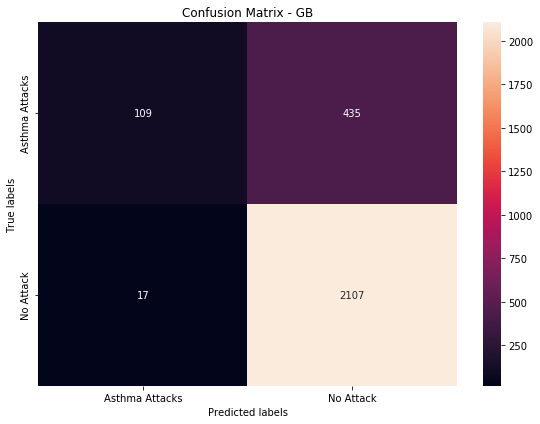

In [180]:
## Accuracy

plt.figure(figsize=(8, 6))
labels = ['Asthma Attacks', 'No Attack']
cm = confusion_matrix(y_test, y_pred2, labels=[1,0])
ax= plt.subplot()
sns.heatmap(cm, annot=True,fmt='g', ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - GB')
ax.xaxis.set_ticklabels(['Asthma Attacks', 'No Attack']) 
ax.yaxis.set_ticklabels(['Asthma Attacks', 'No Attack'],va='center')

plt.tight_layout()
plt.savefig('/rds/general/user/md2620/home/ML_project/Plots/Confusion_Matrix_GB')
plt.show()

In [163]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

TRUE POSITIVES RATES

In [164]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8651


FALSE POSITIVES RATES

In [165]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.1711


PLOT ROC CURVE

In [166]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [167]:
#Keep probabilities of the positive class only
probs = y_pred['p1']

In [168]:
#Compute AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.80


In [169]:
#Get ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

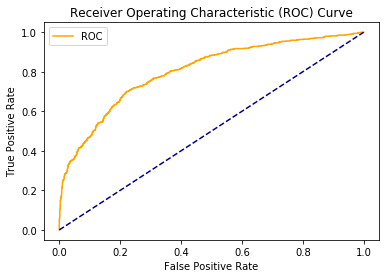

In [170]:
#print ROC curve
plot_roc_curve(fpr, tpr)

In [171]:
#Set gradient boost results in a result table
results.loc['Gradient Boost', 'accuracy'] = accuracy_score(y_test, y_pred2)
results.loc['Gradient Boost', 'f1'] = f1_score(y_test, y_pred2)
results.loc['Gradient Boost', 'precision'] = precision_score(y_test, y_pred2)
results.loc['Gradient Boost', 'recall'] = recall_score(y_test, y_pred2)

In [172]:
results

,accuracy,f1,precision,recall
Random Forest,NaN,NaN,NaN,NaN
Gradient Boost,0.830585,0.325373,0.865079,0.200368
SVM,NaN,NaN,NaN,NaN


TRAINED MODEL SHAP SUMMARY PLOT

In [176]:
best_gb.shap_summary_plot

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gb_grid_model_7


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,402.0,402.0,178290.0,5.0,5.0,5.0,18.0,32.0,27.646767




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.06887828802191079
RMSE: 0.26244673368497234
LogLoss: 0.2342285036372191
Mean Per-Class Error: 0.036965844072043064
AUC: 0.9879349077594475
AUCPR: 0.9851289833260604
Gini: 0.975869815518895

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32062660302814583: 


,,0,1,Error,Rate
0,0,5970.0,442.0,0.0689,(442.0/6412.0)
1,1,32.0,6370.0,0.005,(32.0/6402.0)
2,Total,6002.0,6812.0,0.037,(474.0/12814.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.320627,0.964129,302.0
1,max f2,0.287597,0.983823,313.0
2,max f0point5,0.436990,0.954061,262.0
3,max accuracy,0.323372,0.963009,301.0
4,max precision,0.897918,1.000000,0.0
5,max recall,0.277604,1.000000,317.0
6,max specificity,0.897918,1.000000,0.0
7,max absolute_mcc,0.320627,0.927924,302.0
8,max min_per_class_accuracy,0.428385,0.953213,266.0
9,max mean_per_class_accuracy,0.320627,0.963034,302.0



Gains/Lift Table: Avg response rate: 49.96 %, avg score: 37.12 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010067,0.881539,2.001562,2.001562,1.000000,0.887743,1.000000,0.887743,0.020150,0.020150,100.156201,100.156201,0.020150
1,2,0.020134,0.872587,2.001562,2.001562,1.000000,0.876577,1.000000,0.882160,0.020150,0.040300,100.156201,100.156201,0.040300
2,3,0.030201,0.864467,2.001562,2.001562,1.000000,0.868722,1.000000,0.877681,0.020150,0.060450,100.156201,100.156201,0.060450
3,4,0.040034,0.857851,1.985677,1.997660,0.992063,0.861229,0.998051,0.873640,0.019525,0.079975,98.567660,99.766033,0.079819
4,5,0.050023,0.851753,2.001562,1.998439,1.000000,0.854508,0.998440,0.869820,0.019994,0.099969,100.156201,99.843945,0.099813
5,6,0.100203,0.818011,2.001562,2.000003,1.000000,0.835968,0.999221,0.852868,0.100437,0.200406,100.156201,100.000316,0.200250
6,7,0.149992,0.785963,1.998425,1.999479,0.998433,0.800585,0.998959,0.835513,0.099500,0.299906,99.842477,99.947922,0.299594
7,8,0.200094,0.750843,1.967267,1.991414,0.982866,0.771591,0.994930,0.819507,0.098563,0.398469,96.726734,99.141369,0.396442
8,9,0.300062,0.665024,1.942187,1.975013,0.970336,0.708545,0.986736,0.782539,0.194158,0.592627,94.218703,97.501333,0.584673
9,10,0.400109,0.585251,1.867292,1.948078,0.932917,0.625363,0.973279,0.743238,0.186817,0.779444,86.729186,94.807771,0.758078




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.04078455154252743
RMSE: 0.20195185451618766
LogLoss: 0.13704691831394858
Mean Per-Class Error: 0.03690947005810652
AUC: 0.987958358345398
AUCPR: 0.9454122958143981
Gini: 0.975916716690796

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4371373086474172: 


,,0,1,Error,Rate
0,0,6125.0,287.0,0.0448,(287.0/6412.0)
1,1,78.0,1512.0,0.0491,(78.0/1590.0)
2,Total,6203.0,1799.0,0.0456,(365.0/8002.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.437137,0.892299,233.0
1,max f2,0.325920,0.943509,274.0
2,max f0point5,0.600052,0.875690,159.0
3,max accuracy,0.447826,0.954511,229.0
4,max precision,0.897918,1.000000,0.0
5,max recall,0.277588,1.000000,295.0
6,max specificity,0.897918,1.000000,0.0
7,max absolute_mcc,0.428120,0.866325,238.0
8,max min_per_class_accuracy,0.429798,0.953681,237.0
9,max mean_per_class_accuracy,0.325920,0.963091,274.0



Gains/Lift Table: Avg response rate: 19.87 %, avg score: 18.04 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010122,0.868068,5.032704,5.032704,1.000000,0.879754,1.000000,0.879754,0.050943,0.050943,403.270440,403.270440,0.050943
1,2,0.020120,0.851725,4.969796,5.001445,0.987500,0.859427,0.993789,0.869654,0.049686,0.100629,396.979560,400.144537,0.100473
2,3,0.030117,0.836609,5.032704,5.011822,1.000000,0.844218,0.995851,0.861210,0.050314,0.150943,403.270440,401.182181,0.150787
3,4,0.040115,0.817894,5.032704,5.017026,1.000000,0.827248,0.996885,0.852746,0.050314,0.201258,403.270440,401.702620,0.201102
4,5,0.050112,0.799009,5.032704,5.020154,1.000000,0.809441,0.997506,0.844107,0.050314,0.251572,403.270440,402.015402,0.251416
5,6,0.100225,0.714565,4.706394,4.863274,0.935162,0.758155,0.966334,0.801131,0.235849,0.487421,370.639439,386.327420,0.483211
6,7,0.150087,0.622548,4.288520,4.672328,0.852130,0.665141,0.928393,0.755952,0.213836,0.701258,328.852004,367.232757,0.687846
7,8,0.200075,0.521306,3.422239,4.360001,0.680000,0.578369,0.866334,0.711584,0.171069,0.872327,242.223899,336.000063,0.838952
8,9,0.300050,0.020214,1.277049,3.332778,0.253750,0.329532,0.662224,0.584286,0.127673,1.000000,27.704874,233.277801,0.873518
9,10,0.400025,0.009465,0.000000,2.499844,0.000000,0.011709,0.496720,0.441187,0.000000,1.000000,-100.000000,149.984380,0.748752




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.055605847311641275
RMSE: 0.23580892118756083
LogLoss: 0.17204193875921353
Mean Per-Class Error: 0.06253898939488467
AUC: 0.9731613680324235
AUCPR: 0.8837945752409859
Gini: 0.946322736064847

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30854671990336263: 


,,0,1,Error,Rate
0,0,5813.0,599.0,0.0934,(599.0/6412.0)
1,1,107.0,1483.0,0.0673,(107.0/1590.0)
2,Total,5920.0,2082.0,0.0882,(706.0/8002.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.308547,0.807734,278.0
1,max f2,0.071140,0.908364,344.0
2,max f0point5,0.591416,0.817742,151.0
3,max accuracy,0.455609,0.919645,213.0
4,max precision,0.947859,1.000000,0.0
5,max recall,0.071140,1.000000,344.0
6,max specificity,0.947859,1.000000,0.0
7,max absolute_mcc,0.258973,0.766022,296.0
8,max min_per_class_accuracy,0.332754,0.911950,267.0
9,max mean_per_class_accuracy,0.071140,0.937461,344.0



Gains/Lift Table: Avg response rate: 19.87 %, avg score: 17.57 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010122,0.869650,4.908440,4.908440,0.975309,0.898980,0.975309,0.898980,0.049686,0.049686,390.844010,390.844010,0.049374
1,2,0.020120,0.839876,4.969796,4.938927,0.987500,0.853706,0.981366,0.876484,0.049686,0.099371,396.979560,393.892730,0.098903
2,3,0.030117,0.810798,4.969796,4.949174,0.987500,0.824263,0.983402,0.859149,0.049686,0.149057,396.979560,394.917404,0.148433
3,4,0.040115,0.793017,4.843978,4.922957,0.962500,0.801046,0.978193,0.844668,0.048428,0.197484,384.397799,392.295695,0.196393
4,5,0.050112,0.774626,4.403616,4.819348,0.875000,0.784432,0.957606,0.832651,0.044025,0.241509,340.361635,381.934786,0.238858
5,6,0.100100,0.684765,4.529434,4.674572,0.900000,0.730743,0.928839,0.781761,0.226415,0.467925,352.943396,367.457188,0.459035
6,7,0.150087,0.591791,3.787110,4.378998,0.752500,0.633710,0.870108,0.732452,0.189308,0.657233,278.711006,337.899759,0.632903
7,8,0.200075,0.464860,2.805733,3.985927,0.557500,0.535973,0.792005,0.683363,0.140252,0.797484,180.573270,298.592703,0.745550
8,9,0.300050,0.036340,2.025664,3.332778,0.402500,0.324400,0.662224,0.563758,0.202516,1.000000,102.566352,233.277801,0.873518
9,10,0.400025,0.015610,0.000000,2.499844,0.000000,0.020188,0.496720,0.427908,0.000000,1.000000,-100.000000,149.984380,0.748752




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.9204022,0.0049276305,0.9123867,0.9234095,0.92435426,0.9228871,0.9189737
1,auc,0.9739871,0.0036088587,0.97115684,0.98016405,0.97193545,0.97267526,0.97400385
2,aucpr,0.88992846,0.019751564,0.8825411,0.91770047,0.86477816,0.8855753,0.89904714
3,err,0.079597756,0.0049276305,0.08761329,0.076590486,0.07564576,0.07711289,0.08102633
4,err_count,127.4,10.014989,145.0,124.0,123.0,125.0,120.0
5,f0point5,0.78081596,0.024888724,0.7497635,0.7659033,0.80914146,0.80254394,0.7767277
6,f1,0.81527174,0.008114243,0.81386393,0.8292011,0.8098918,0.8091603,0.81424147
7,f2,0.85518926,0.042162005,0.88994944,0.9039039,0.81064355,0.8158867,0.8555628
8,lift_top_group,4.974131,0.15623708,4.95509,5.172524,4.7379346,5.0185757,4.986532
9,logloss,0.17202693,0.011728984,0.16591881,0.15853433,0.17599528,0.18966614,0.17002009



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-05-03 20:35:11,2 min 24.947 sec,0.0,0.583564,0.918195,0.500000,0.499610,1.000000,0.500390,0.399022,0.498595,0.500000,0.198700,1.000000,0.801300
1,,2021-05-03 20:35:11,2 min 25.114 sec,10.0,0.569269,0.867486,0.974215,0.965800,1.986625,0.056579,0.386165,0.466777,0.974273,0.881402,4.971330,0.071482
2,,2021-05-03 20:35:11,2 min 25.270 sec,20.0,0.555048,0.820259,0.976195,0.968585,1.986283,0.053691,0.374164,0.437965,0.976221,0.889953,4.970572,0.067608
3,,2021-05-03 20:35:11,2 min 25.424 sec,30.0,0.539120,0.770710,0.977214,0.970229,2.001562,0.053145,0.361424,0.408460,0.977249,0.895365,4.970572,0.065109
4,,2021-05-03 20:35:11,2 min 25.574 sec,40.0,0.524280,0.727536,0.978450,0.971840,2.001562,0.052521,0.350216,0.383449,0.978490,0.900465,4.970572,0.063234
5,,2021-05-03 20:35:12,2 min 25.727 sec,50.0,0.509068,0.686140,0.978766,0.972445,2.001562,0.050882,0.339207,0.359975,0.978809,0.902594,4.971330,0.064359
6,,2021-05-03 20:35:12,2 min 25.879 sec,60.0,0.497551,0.656883,0.978993,0.972718,2.001562,0.051038,0.331158,0.343697,0.979022,0.903351,4.970572,0.063734
7,,2021-05-03 20:35:12,2 min 26.029 sec,70.0,0.482665,0.620343,0.979345,0.973154,2.001562,0.049555,0.321199,0.323864,0.979395,0.904895,4.970572,0.061985
8,,2021-05-03 20:35:12,2 min 26.183 sec,80.0,0.467440,0.585117,0.979617,0.973551,2.001562,0.049321,0.311369,0.305121,0.979649,0.906110,4.970572,0.062234
9,,2021-05-03 20:35:12,2 min 26.336 sec,90.0,0.455658,0.559290,0.979848,0.973812,2.001562,0.048463,0.303969,0.291601,0.979877,0.906872,4.970572,0.062359



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,MCQ010,83093.500000,1.000000,0.702798
1,MCQ300B,6875.862793,0.082749,0.058155
2,HSQ493,3657.989990,0.044023,0.030939
3,HSQ496,3409.217285,0.041029,0.028835
4,HSQ470,3303.984375,0.039762,0.027945
5,PEASCTM1,2855.211426,0.034361,0.024149
6,MCQ160K,2271.544189,0.027337,0.019213
7,HSQ480,2070.987549,0.024924,0.017516
8,SMD100BR,1923.933960,0.023154,0.016272
9,INDHHIN2,1060.227173,0.012759,0.008967



See the whole table with table.as_data_frame()


<bound method shap_summary_plot of >

In [175]:
best_gb.varimp(use_pandas = True).head(20)

,variable,relative_importance,scaled_importance,percentage
0,MCQ010,83093.500000,1.000000,0.702798
1,MCQ300B,6875.862793,0.082749,0.058155
2,HSQ493,3657.989990,0.044023,0.030939
3,HSQ496,3409.217285,0.041029,0.028835
4,HSQ470,3303.984375,0.039762,0.027945
5,PEASCTM1,2855.211426,0.034361,0.024149
6,MCQ160K,2271.544189,0.027337,0.019213
7,HSQ480,2070.987549,0.024924,0.017516
8,SMD100BR,1923.933960,0.023154,0.016272
9,INDHHIN2,1060.227173,0.012759,0.008967


In [173]:
def plot_varimp(h2o_model, n_features = None):
    """Plot variable importance for H2O tree-based models"""
    importances = h2o_model.varimp()
    feature_labels = [tup[0] for tup in importances]
    feature_imp = [tup[3] for tup in importances]

    # specify bar centers on the y axis, but flip the order so largest bar appears at top
    pos = range(len(feature_labels))[::-1]
    if n_features is None:
        n_features = min(len(feature_imp), 10)

    fig, ax = plt.subplots(1, 1)
    
    plt.barh(pos[:n_features], feature_imp[:n_features],
             align = 'center', height = 0.8, color=['tomato','lightgreen','lightseagreen','royalblue','mediumpurple','mediumvioletred','gold','gainsboro','olive','aliceblue','paleturquoise','orchid','burlywood','brown','cyan','peachpuff','hotpink','mediumaquamarine','slategrey','navy'], edgecolor = '#7B7B7B')

    # Hide the right and top spines, color others grey
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_color('#7B7B7B')
    ax.spines['left'].set_color('#7B7B7B')

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    plt.yticks(pos[:n_features], feature_labels[:n_features])
    plt.ylim([min(pos[:n_features]) - 1, max(pos[:n_features]) + 1])

    title_fontsize = 14
    algo = h2o_model._model_json['algo']
    if algo == 'gbm':
        plt.title('Variable Importance: H2O GBM', fontsize=title_fontsize)
    elif algo == 'drf':
        plt.title('Variable Importance: H2O RF', fontsize=title_fontsize)
    elif algo == 'xgboost':
        plt.title('Variable Importance: H2O XGBoost', fontsize=title_fontsize)
    plt.savefig('/rds/general/user/md2620/home/ML_project/Plots/Variable_importance_plot_GB')
    plt.show()

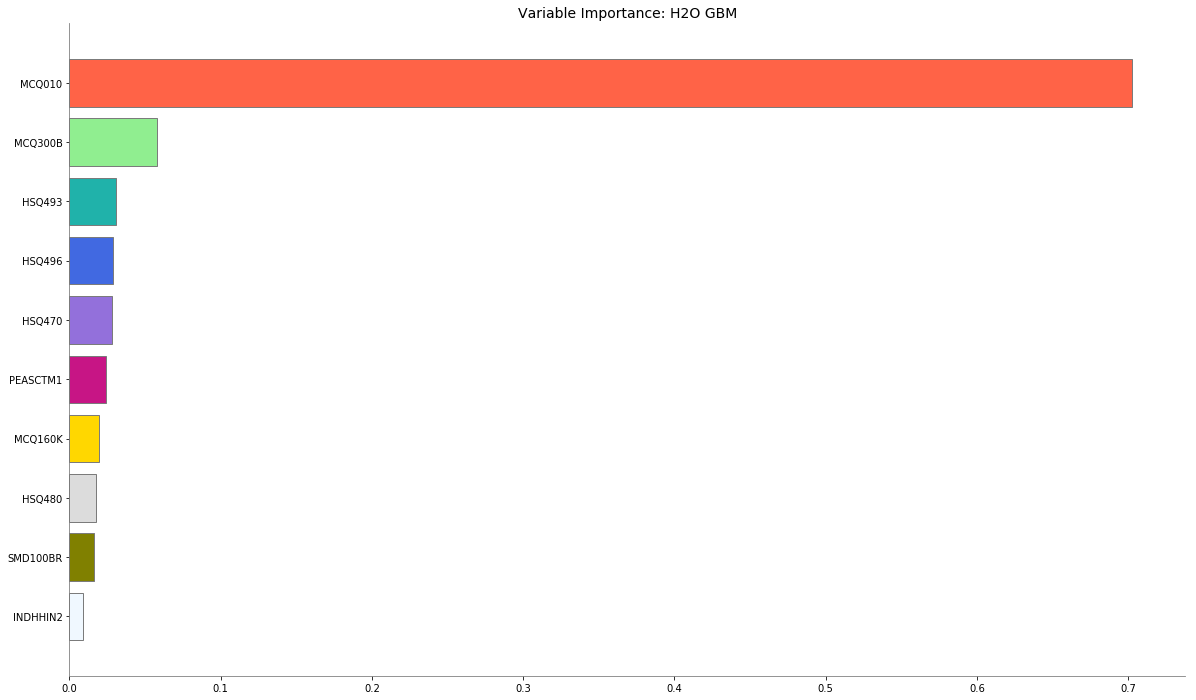

In [174]:

plt.rcParams['figure.figsize'] = 20, 12

plot_varimp(best_gb)

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


,indhhin2,mean_response,stddev_response,std_error_mean_response
0,"$ 0 to $ 4,999",0.239141,0.219804,0.002457
1,"$ 5,000 to $ 9,999",0.241729,0.220441,0.002464
2,"$10,000 to $14,999",0.264692,0.230676,0.002579
3,"$100,000 and Over",0.268802,0.235344,0.002631
4,"$15,000 to $19,999",0.274767,0.234605,0.002623
5,"$20,000 to $24,999",0.266600,0.232227,0.002596
6,"$25,000 to $34,999",0.267724,0.234118,0.002617
7,"$35,000 to $44,999",0.277344,0.235949,0.002638
8,"$45,000 to $54,999",0.266228,0.235248,0.002630
9,"$55,000 to $64,999",0.262075,0.232661,0.002601


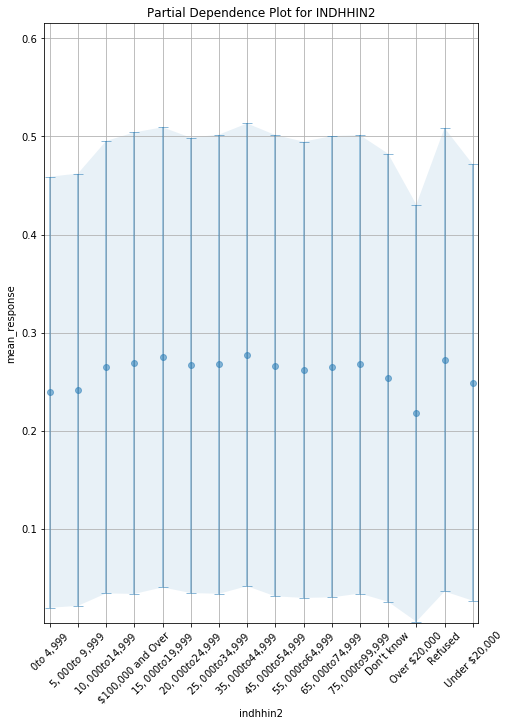

In [184]:
partial_dep = best_gb.partial_plot(df_train_h2o, cols=['INDHHIN2'], plot=True)
partial_dep[0].as_data_frame()

SHAP PLOT ON TEST SET USING BEST GB MODEL

<Figure size 576x432 with 0 Axes>

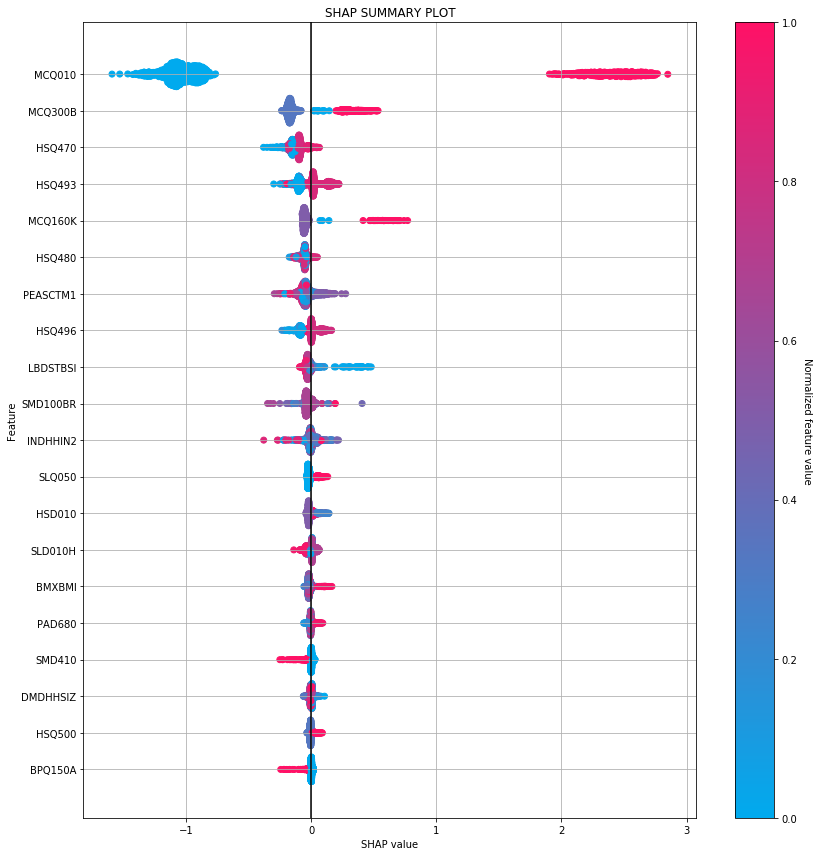

In [176]:
plt.figure(figsize=(8, 6))
shap = best_gb.shap_summary_plot(df_test_h2o)
plt.title('SHAP SUMMARY PLOT')
plt.tight_layout()
plt.savefig('/rds/general/user/md2620/home/ML_project/Plots/Shap_plot_GB')
plt.show()

RANDOM FOREST AS COMPARAISON

In [186]:
# RF hyperparameters
#sample_rate = Sample 80% of rows per tree
#col_sample_rate = Sample 80% of columns per split
rf_params = {'max_depth': [3,4,5,6,7,8,9],
                'sample_rate': [0.8, 1.0],
                'min_rows': [5,7,10,15,20]}

# Train and validate a cartesian grid of GBMs
rf_grid = H2OGridSearch(model=H2ORandomForestEstimator,
                        hyper_params=rf_params)

#Early stopping once the validation AUC doesn't improve by at least 0.01% for 5 consecutive scoring events
#Score_tree_interval means that we score every 10 trees to marke early stopping reproducible
#Fixing a random number generator seed for reproducibility
#We make nb of trees much larger than enough since we have early stopping
#Since I am using N fold cross validation, and the size of my dataset is relatively small, I am not splitting the training set
#but instead use the whole training set, therefore training_frame and validation_frame are the same.
#I am checking the bias and the variance of the model from my N fold Cross Validation's mean and Std Dev of accuracy score

rf_grid.train(x=x, y=y,
                training_frame=df_train_h2o,
                ntrees=10000,
                stopping_rounds = 5, 
                stopping_tolerance = 1e-4, 
                stopping_metric = "AUC",
                score_tree_interval = 10, 
                nfolds=5,
                balance_classes=True,
                seed=121)

# Get the grid results, sorted by validation AUC
rf_gridperf = rf_grid.get_grid(sort_by='auc', decreasing=True)
rf_gridperf

# Grab the top GBM model, chosen by validation AUC
best_rf = rf_gridperf.models[0]

drf Grid Build progress: |████████████████████████████████████████████████| 100%


In [187]:
#Predict the Target variable for the Test Set now that you found your best tuned model
y_predicted_rf =best_rf.predict(test_data=df_test_h2o)

drf prediction progress: |████████████████████████████████████████████████| 100%


Test/Validation dataset column 'DBQ915' has levels not trained on: ["Don't know"]
Test/Validation dataset column 'MCQ300C' has levels not trained on: ["Refused"]
Test/Validation dataset column 'PAQ665' has levels not trained on: ["Don't know"]
Test/Validation dataset column 'SMD100BR' has levels not trained on: ["BENSON & HEDGES ULTRA LIGHT", "CAMEL 99'S BLUE", "CAMEL 99'S GOLD", "CAMEL WIDES LIGHT", "CAPRI INDIGO", "CAPRI MAGENTA", "CHEYENNE LIGHT", "COMMONWEALTH", "CRAVEN A", "DJARUM", ...16 not listed..., "NOW", "PYRAMID", "PYRAMID ORANGE", "ROGER", "SIGNATURE", "SONOMA", "USA GOLD LIGHT", "VIRGINIA SLIMS GOLD", "VIRGINIA SLIMS LUXURY ULTRA LIGHT", "WINSTON GOLD"]


In [188]:
## Converting Predicted Results to Python Dataframe
y_pred_rf=y_predicted_rf.as_data_frame()

In [189]:
#Check the dataframe
y_pred_rf.head(5)

,predict,p0,p1
0,0,0.861304,0.138696
1,0,0.957119,0.042881
2,0,0.945372,0.054628
3,1,0.784658,0.215342
4,0,0.892634,0.107366


In [190]:
#You can reset your y_test so it is only the casecontrol variable
y_pred3 = y_pred_rf['predict']
y_pred3

0       0
1       0
2       0
3       1
4       0
       ..
2663    0
2664    0
2665    0
2666    0
2667    0
Name: predict, Length: 2668, dtype: int64

In [191]:
best_rf.shap_summary_plot

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  Grid_DRF_py_2_sid_a617_model_python_1620070336331_27087_model_21


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,260.0,260.0,555922.0,9.0,9.0,9.0,103.0,215.0,159.83846




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.22270372326396792
RMSE: 0.47191495342271994
LogLoss: 0.6248560718825095
Mean Per-Class Error: 0.17727586146490149
AUC: 0.9085466700015474
AUCPR: 0.9113667776279228
Gini: 0.8170933400030949

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.16999719447389855: 


,,0,1,Error,Rate
0,0,4644.0,1768.0,0.2757,(1768.0/6412.0)
1,1,638.0,5772.0,0.0995,(638.0/6410.0)
2,Total,5282.0,7540.0,0.1876,(2406.0/12822.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.169997,0.827527,296.0
1,max f2,0.141616,0.887801,316.0
2,max f0point5,0.227344,0.838069,255.0
3,max accuracy,0.186957,0.822727,280.0
4,max precision,0.947274,1.000000,0.0
5,max recall,0.042341,1.000000,382.0
6,max specificity,0.947274,1.000000,0.0
7,max absolute_mcc,0.193981,0.646207,275.0
8,max min_per_class_accuracy,0.183116,0.819557,283.0
9,max mean_per_class_accuracy,0.186957,0.822724,280.0



Gains/Lift Table: Avg response rate: 49.99 %, avg score: 25.43 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010061,0.833496,2.000312,2.000312,1.000000,0.871074,1.000000,0.871074,0.020125,0.020125,100.031201,100.031201,0.020125
1,2,0.020044,0.788307,2.000312,2.000312,1.000000,0.810638,1.000000,0.840974,0.019969,0.040094,100.031201,100.031201,0.040094
2,3,0.030027,0.758679,1.969057,1.989921,0.984375,0.772036,0.994805,0.818054,0.019657,0.059750,96.905714,98.992078,0.059438
3,4,0.040009,0.728920,2.000312,1.992514,1.000000,0.743552,0.996101,0.799465,0.019969,0.079719,100.031201,99.251353,0.079407
4,5,0.050070,0.701457,2.000312,1.994081,1.000000,0.715465,0.996885,0.782587,0.020125,0.099844,100.031201,99.408051,0.099532
5,6,0.100062,0.581408,1.981588,1.987839,0.990640,0.635564,0.993765,0.709132,0.099064,0.198908,98.158834,98.783930,0.197660
6,7,0.150055,0.483084,1.944141,1.973281,0.971919,0.529927,0.986486,0.649428,0.097192,0.296100,94.414100,97.328077,0.292045
7,8,0.200047,0.404975,1.869246,1.947282,0.934477,0.441313,0.973489,0.597420,0.093448,0.389548,86.924633,94.728230,0.378942
8,9,0.300031,0.293096,1.719457,1.871360,0.859594,0.346583,0.935534,0.513829,0.171919,0.561466,71.945697,87.136026,0.522789
9,10,0.400016,0.236487,1.401155,1.753832,0.700468,0.263166,0.876779,0.451175,0.140094,0.701560,40.115459,75.383176,0.602995




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.11662591043349536
RMSE: 0.3415053593042068
LogLoss: 0.3766668318328554
Mean Per-Class Error: 0.23685924975576456
AUC: 0.8380051456192595
AUCPR: 0.6704846614509391
Gini: 0.6760102912385191

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20189585270581542: 


,,0,1,Error,Rate
0,0,5554.0,858.0,0.1338,(858.0/6412.0)
1,1,549.0,1041.0,0.3453,(549.0/1590.0)
2,Total,6103.0,1899.0,0.1758,(1407.0/8002.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.201896,0.596733,221.0
1,max f2,0.167361,0.658378,252.0
2,max f0point5,0.356915,0.687583,133.0
3,max accuracy,0.342093,0.865159,140.0
4,max precision,0.870916,1.000000,0.0
5,max recall,0.023481,1.000000,397.0
6,max specificity,0.870916,1.000000,0.0
7,max absolute_mcc,0.342093,0.517961,140.0
8,max min_per_class_accuracy,0.169561,0.753899,249.0
9,max mean_per_class_accuracy,0.185205,0.763141,233.0



Gains/Lift Table: Avg response rate: 19.87 %, avg score: 16.38 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010122,0.700316,4.908440,4.908440,0.975309,0.762911,0.975309,0.762911,0.049686,0.049686,390.844010,390.844010,0.049374
1,2,0.020120,0.620368,4.969796,4.938927,0.987500,0.661806,0.981366,0.712672,0.049686,0.099371,396.979560,393.892730,0.098903
2,3,0.030117,0.558984,4.718160,4.865644,0.937500,0.588121,0.966805,0.671327,0.047170,0.146541,371.816038,386.564368,0.145293
3,4,0.040115,0.512271,4.340708,4.734818,0.862500,0.533416,0.940810,0.636957,0.043396,0.189937,334.070755,373.481847,0.186974
4,5,0.050112,0.464978,4.340708,4.656193,0.862500,0.488560,0.925187,0.607352,0.043396,0.233333,334.070755,365.619285,0.228655
5,6,0.100100,0.335850,3.560638,4.109099,0.707500,0.391602,0.816479,0.499612,0.177987,0.411321,256.063836,310.909947,0.388395
6,7,0.150087,0.267928,1.962755,3.394247,0.390000,0.294715,0.674438,0.431369,0.098113,0.509434,96.275472,239.424693,0.448455
7,8,0.200075,0.230458,1.786610,2.992589,0.355000,0.248252,0.594628,0.385619,0.089308,0.598742,78.661006,199.258875,0.497526
8,9,0.300050,0.176117,1.119777,2.368578,0.222500,0.195976,0.470637,0.322431,0.111950,0.710692,11.977673,136.857808,0.512470
9,10,0.400025,0.161241,0.792651,1.974719,0.157500,0.168720,0.392377,0.284015,0.079245,0.789937,-20.734906,97.471938,0.486600




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.83873737,0.027672099,0.81680775,0.8529957,0.82052857,0.8809377,0.82241726
1,auc,0.8387898,0.012685589,0.8219669,0.85605955,0.8322416,0.8425295,0.8411516
2,aucpr,0.6729235,0.021394191,0.64665437,0.7059186,0.6724646,0.6738056,0.6657742
3,err,0.1612626,0.027672099,0.18319227,0.14700432,0.17947142,0.119062304,0.17758271
4,err_count,257.8,44.245903,303.0,238.0,292.0,193.0,263.0
5,f0point5,0.60673916,0.06462566,0.5610907,0.6350682,0.5590885,0.7079208,0.5705275
6,f1,0.6016894,0.018437147,0.5854993,0.63271606,0.59103644,0.59707725,0.602118
7,f2,0.6046047,0.050249018,0.61212814,0.6303813,0.6268568,0.5162455,0.6374119
8,lift_top_group,4.974189,0.07160771,4.879056,4.9662576,5.037152,5.051811,4.9366665
9,logloss,0.37662554,0.0149465585,0.39704,0.37483945,0.37711263,0.35501128,0.37912437



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-05-03 21:56:14,7 min 41.824 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2021-05-03 21:56:14,7 min 42.039 sec,10.0,0.479800,0.725373,0.842363,0.833346,1.800281,0.252844
2,,2021-05-03 21:56:14,7 min 42.269 sec,20.0,0.472841,0.635290,0.874029,0.873485,1.969299,0.218345
3,,2021-05-03 21:56:14,7 min 42.451 sec,30.0,0.469754,0.623360,0.888145,0.888501,1.953793,0.204624
4,,2021-05-03 21:56:15,7 min 42.640 sec,40.0,0.471808,0.625977,0.893368,0.895850,2.000312,0.210530
5,,2021-05-03 21:56:15,7 min 42.823 sec,50.0,0.473308,0.628821,0.895634,0.898703,2.000312,0.202387
6,,2021-05-03 21:56:15,7 min 43.008 sec,60.0,0.473826,0.629758,0.897758,0.901197,2.000312,0.193652
7,,2021-05-03 21:56:15,7 min 43.194 sec,70.0,0.474082,0.630043,0.898995,0.902564,2.000312,0.194041
8,,2021-05-03 21:56:15,7 min 43.374 sec,80.0,0.473041,0.627629,0.901196,0.904703,1.984806,0.195757
9,,2021-05-03 21:56:16,7 min 43.566 sec,90.0,0.473078,0.627546,0.903005,0.906700,1.984806,0.201295



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,MCQ300B,33935.605469,1.000000,0.133140
1,HSQ470,20586.675781,0.606639,0.080768
2,HSQ480,20082.437500,0.591781,0.078790
3,HSQ496,19390.406250,0.571388,0.076075
4,HSQ493,19257.636719,0.567476,0.075554
5,PEASCTM1,16738.892578,0.493255,0.065672
6,MCQ160K,12217.795898,0.360029,0.047934
7,INDHHIN2,9463.277344,0.278860,0.037127
8,LBDSTBSI,7816.267578,0.230326,0.030666
9,SLD010H,7151.622559,0.210741,0.028058



See the whole table with table.as_data_frame()


<bound method shap_summary_plot of >

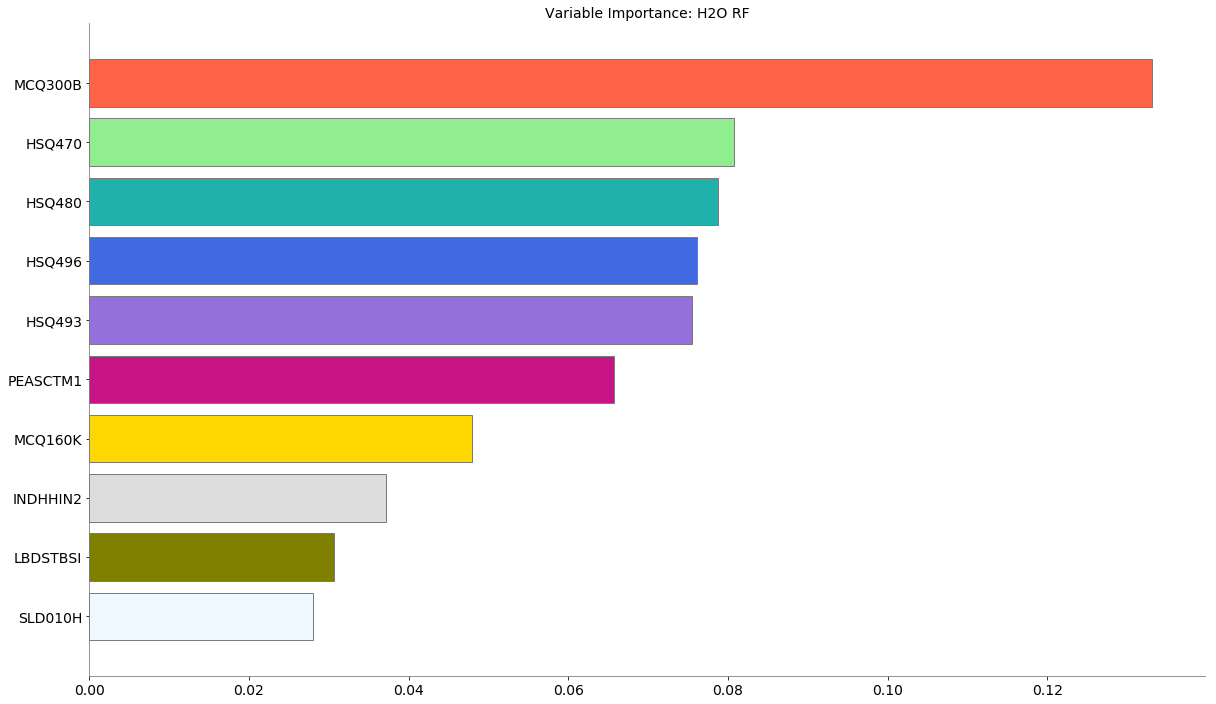

In [239]:
plt.rcParams['figure.figsize'] = 20, 12

plot_varimp(best_rf)

Test/Validation dataset column 'DBQ915' has levels not trained on: ["Don't know"]
Test/Validation dataset column 'MCQ300C' has levels not trained on: ["Refused"]
Test/Validation dataset column 'PAQ665' has levels not trained on: ["Don't know"]
Test/Validation dataset column 'SMD100BR' has levels not trained on: ["BENSON & HEDGES ULTRA LIGHT", "CAMEL 99'S BLUE", "CAMEL 99'S GOLD", "CAMEL WIDES LIGHT", "CAPRI INDIGO", "CAPRI MAGENTA", "CHEYENNE LIGHT", "COMMONWEALTH", "CRAVEN A", "DJARUM", ...16 not listed..., "NOW", "PYRAMID", "PYRAMID ORANGE", "ROGER", "SIGNATURE", "SONOMA", "USA GOLD LIGHT", "VIRGINIA SLIMS GOLD", "VIRGINIA SLIMS LUXURY ULTRA LIGHT", "WINSTON GOLD"]


<Figure size 576x432 with 0 Axes>

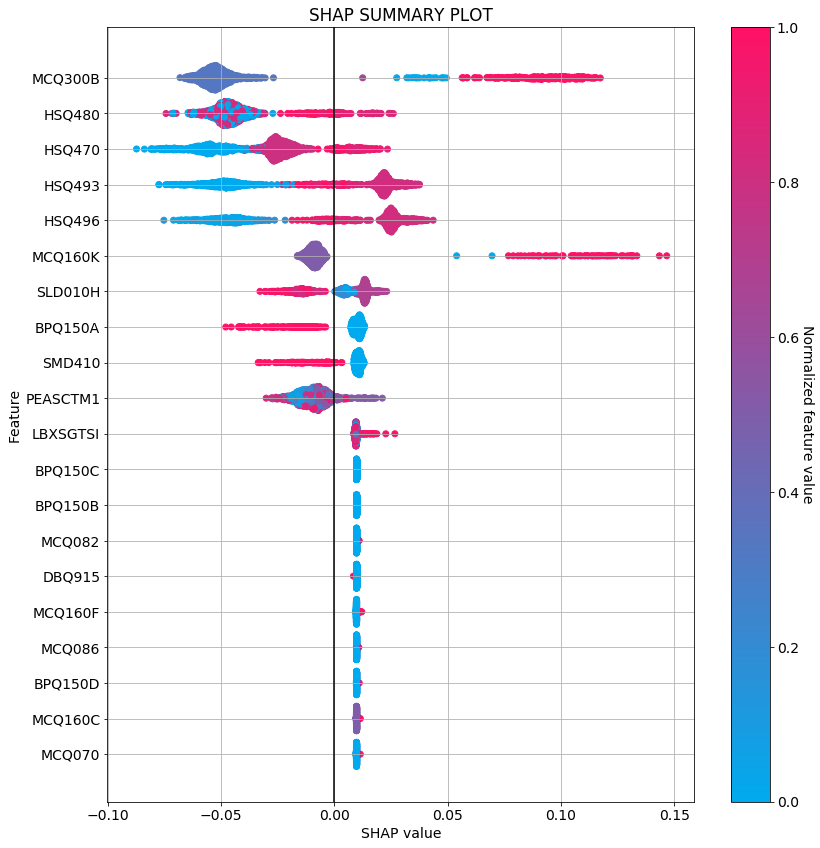

In [240]:
#SHAP PLOT ON RF
plt.figure(figsize=(8, 6))
shap = best_rf.shap_summary_plot(df_test_h2o)
plt.title('SHAP SUMMARY PLOT')
plt.tight_layout()
plt.savefig('/rds/general/user/md2620/home/ML_project/Plots/Shap_plot_RF')
plt.show()

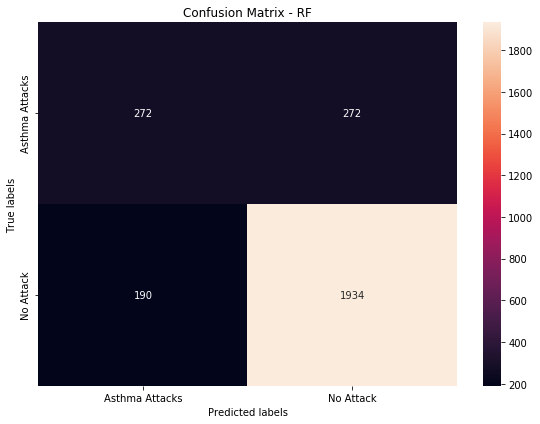

In [192]:
## Accuracy

plt.figure(figsize=(8, 6))
labels = ['Asthma Attacks', 'No Attack']
cm1 = confusion_matrix(y_test, y_pred3, labels=[1,0])
ax= plt.subplot()
sns.heatmap(cm1, annot=True,fmt='g', ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - RF')
ax.xaxis.set_ticklabels(['Asthma Attacks', 'No Attack']) 
ax.yaxis.set_ticklabels(['Asthma Attacks', 'No Attack'],va='center')

plt.tight_layout()
plt.savefig('/rds/general/user/md2620/home/ML_project/Plots/Confusion_Matrix_RF')
plt.show()

In [193]:
TP_rf = cm1[0,0]
TN_rf = cm1[1,1]
FP_rf = cm1[0,1]
FN_rf = cm1[1,0]

TRUE POSITIVE RATES

In [194]:
true_positive_rate_rf = TP_rf / float(TP_rf + FN_rf)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate_rf))

True Positive Rate : 0.5887


FALSE POSITIVE RATES

In [195]:
false_positive_rate_rf = FP_rf / float(FP_rf + TN_rf)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate_rf))

False Positive Rate : 0.1233


In [196]:
#Keep probabilities of the positive class only
probs_rf = y_pred_rf['p1']

In [197]:
#Compute AUC
from sklearn.metrics import roc_auc_score
auc_rf = roc_auc_score(y_test, probs_rf)
print('AUC: %.2f' % auc_rf)

AUC: 0.82


In [198]:
#Get ROC Curve
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, probs_rf)

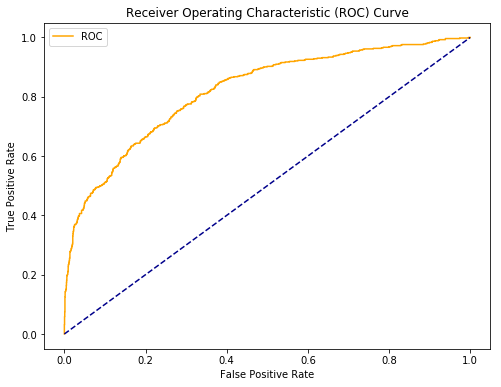

No handles with labels found to put in legend.


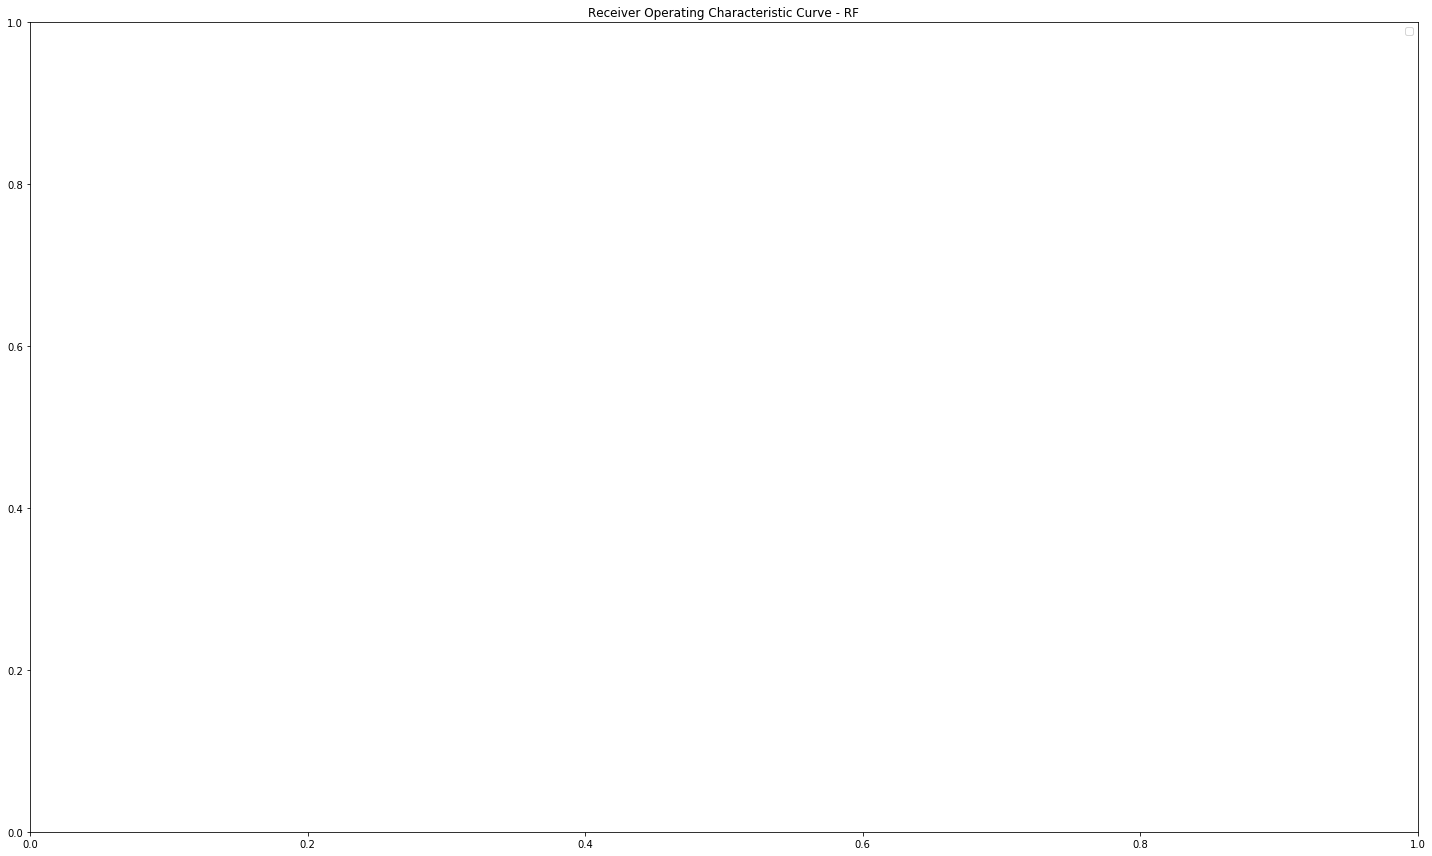

In [199]:
#print ROC curve
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_rf, tpr_rf)
plt.title('Receiver Operating Characteristic Curve - RF')
plt.legend()
plt.tight_layout()
plt.savefig('/rds/general/user/md2620/home/ML_project/Plots/ROC_RF')
plt.show()

In [200]:
#Set drf results in the result table
results.loc['Random Forest', 'accuracy'] = accuracy_score(y_test, y_pred3)
results.loc['Random Forest', 'f1'] = f1_score(y_test, y_pred3)
results.loc['Random Forest', 'precision'] = precision_score(y_test, y_pred3)
results.loc['Random Forest', 'recall'] = recall_score(y_test, y_pred3)

In [201]:
#See results
results

,accuracy,f1,precision,recall
Random Forest,0.826837,0.540755,0.588745,0.5
Gradient Boost,0.830585,0.325373,0.865079,0.200368
SVM,NaN,NaN,NaN,NaN


SVM

In [202]:
#Load a different X_train set that is already one-hot encoded
X_train_2 = pd.read_csv('/rds/general/user/md2620/home/ML_project/X_train_encoded.csv')

In [203]:
X_train_2.shape

(8002, 323)

In [204]:
REMOVE VARIABLES WITH VERY CLOSE MEANING TO OTHERS JUST LIKE YOU DID FOR THE TREES

SyntaxError: invalid syntax (<ipython-input-204-0fa67fe72c23>, line 1)

#Drop the variables you specify above from both X_train and X_test. Drop SEQN as well so it does not impact models' prediction.
Variables to drop are all variables starting with 'DBQ197','PEASCST1','BPXPULS','BMXWT','BMXHT','BMXLEG','BMXARML','BMXARMC','BMXWAIST','BMXTRI'.

In [205]:
#Find some variables names you want to remove
X_train_2.filter(regex='MCQ010',axis=1).head()

,MCQ010_Don't know,MCQ010_No,MCQ010_Yes
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0


In [14]:
#Find some variables names you want to remove
X_train_2.filter(regex='DBQ',axis=1).head()
#Remove DBQ197 from dataset

,DBQ197,DBQ700_Don't know,DBQ700_Excellent,DBQ700_Fair,DBQ700_Good,DBQ700_Poor,DBQ700_Very good,DBQ229_Don't know,"DBQ229_{I've/He's/She's} been a regular milk drinker for most or all of {my/his/her} life, including {my/his/her} childhood",DBQ229_{I've/He's/She's} never been a regular milk drinker;,DBQ229_{My/His/Her} milk drinking has varied over {my/his/her} life-sometimes {I've/he's/she's} been a regular milk drinker,DBQ915_No,DBQ915_Yes,DBQ920_Don't know,DBQ920_No,DBQ920_Yes
0,-0.195582,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0
1,0.766813,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,-1.157978,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0.766813,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.766813,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [15]:
X_train_2.filter(regex='PEASCST1',axis=1).head()
#Remove PEASCST1_Complete, PEASCST1_Not done, PEASCST1_Partial

,PEASCST1_Complete,PEASCST1_Not done,PEASCST1_Partial
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [91]:
X_train_2.filter(regex='BPXPULS',axis=1).head()
#Remove BPXPULS_Irregular, BPXPULS_Regular

,BPXPULS_Irregular,BPXPULS_Regular
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [92]:
X_train_2.filter(regex='BMX',axis=1).head()

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,BMXTRI
0,1.682400,1.195892,1.203388,2.257515e+00,1.429301,1.173139,1.521191,-4.312763e-01
1,1.457551,0.640504,1.574374,-4.736278e-01,0.703731,1.567580,1.663912,-2.844806e-15
2,0.137364,0.596426,-0.149760,-8.740558e-02,0.373927,0.042406,0.027083,-2.844806e-15
3,-0.983671,-1.210789,-0.596845,2.744274e-14,-1.159664,-1.035734,-0.722201,-7.515730e-01
4,0.041000,0.878528,-0.479129,4.367531e-01,0.571810,0.252775,-0.579480,-1.616374e+00


In [206]:
#Drop the variables you specify above from both X_train and X_test. Drop SEQN as well so it does not impact models' prediction
X_train_2.drop(['DBQ197','PEASCST1_Complete','PEASCST1_Not done','PEASCST1_Partial','BPXPULS_Irregular','BPXPULS_Regular','BMXWT','BMXHT','BMXLEG','BMXARML','BMXARMC','BMXWAIST','BMXTRI','SEQN',"MCQ010_Don't know",'MCQ010_No','MCQ010_Yes'], axis =1, inplace = True)

In [207]:
X_train_2.shape

(8002, 306)

In [208]:
X_train_2.head(5)

,LBDSALSI,LBXSATSI,LBXSASSI,LBXSAPSI,LBDSBUSI,LBDSCASI,LBDSCHSI,LBXSC3SI,LBDSCRSI,LBXSGTSI,...,SMD100BR_SALEM ULTRA LIGHT,SMD100BR_SENECA,SMD100BR_TUCSON,SMD100BR_VIRGINIA SLIMS,SMD100BR_VIRGINIA SLIMS ULTRA LIGHT,SMD100BR_WINGS,SMD410_No,SMD410_Yes,SMQ680_No,SMQ680_Yes
0,9.691139e-01,-0.308545,0.026750,-0.545771,3.434071e-01,1.836622e-01,-2.160481e-02,-6.898926e-01,2.696508e-01,-0.347502,...,0,0,0,0,0,0,1,0,1,0
1,-4.619780e-01,-0.479643,-0.708059,-0.566575,-8.001147e-01,-1.561095e-01,-8.152819e-02,1.598887e+00,-5.395014e-01,0.595319,...,0,0,0,0,0,0,0,1,0,1
2,2.535680e-01,-0.992937,-0.708059,-1.024264,5.733892e-01,-4.958812e-01,6.828027e-02,-1.176976e-01,1.301636e-01,-0.426071,...,0,0,0,0,0,0,0,0,0,0
3,-2.542130e-15,0.000000,0.000000,0.000000,-3.858340e-14,3.017779e-14,-1.023513e-15,2.032845e-15,3.587752e-15,0.000000,...,0,0,0,0,0,0,1,0,0,0
4,6.113409e-01,0.290297,1.286424,-0.254515,-1.165570e-01,8.632057e-01,-1.392928e+00,1.026692e+00,1.301636e-01,-0.583208,...,0,0,0,0,0,0,1,0,1,0


In [209]:
#Load test set which has been one-hot encoded and repeat what you have done for X_train encoded
X_test_2 = pd.read_csv('/rds/general/user/md2620/home/ML_project/X_test_encoded.csv')

In [20]:
X_test_2.shape

(2668, 323)

In [210]:
#Drop the variables you specify above from both X_train and X_test. Drop SEQN as well so it does not impact models' prediction
X_test_2.drop(['DBQ197','PEASCST1_Complete','PEASCST1_Not done','PEASCST1_Partial','BPXPULS_Irregular','BPXPULS_Regular','BMXWT','BMXHT','BMXLEG','BMXARML','BMXARMC','BMXWAIST','BMXTRI','SEQN',"MCQ010_Don't know",'MCQ010_No','MCQ010_Yes'], axis =1, inplace = True)

In [211]:
X_test_2.shape

(2668, 306)

In [212]:
X_test_2.head(5)

,LBDSALSI,LBXSATSI,LBXSASSI,LBXSAPSI,LBDSBUSI,LBDSCASI,LBDSCHSI,LBXSC3SI,LBDSCRSI,LBXSGTSI,...,SMD100BR_SALEM ULTRA LIGHT,SMD100BR_SENECA,SMD100BR_TUCSON,SMD100BR_VIRGINIA SLIMS,SMD100BR_VIRGINIA SLIMS ULTRA LIGHT,SMD100BR_WINGS,SMD410_No,SMD410_Yes,SMQ680_No,SMQ680_Yes
0,0.253568,-0.479643,-0.918005,-0.462555,1.256947,0.863206,1.587108,-0.689893,0.409138,-0.111797,...,0,0,0,0,0,0,1,0,1,0
1,1.326887,0.461395,-0.393141,-0.816223,0.343407,-0.835653,1.319757,0.454497,0.297422,0.281045,...,0,0,0,0,0,0,1,0,1,0
2,-0.104205,-0.736290,-0.078222,-1.149088,0.573389,0.523434,-1.451699,-0.689893,0.185706,-0.543924,...,0,0,0,0,0,0,1,0,1,0
3,-2.250843,0.033651,0.341669,-0.816223,-1.253690,1.202977,-0.915846,1.598887,-0.957963,1.106014,...,0,0,0,0,0,0,1,0,1,0
4,-1.893070,0.632493,-0.288168,-0.462555,0.343407,-0.835653,0.097090,-1.834283,-0.148811,0.595319,...,0,0,0,0,0,0,0,1,0,1


In [213]:
#Check y_train and y_test again
y_train

,SEQN,casecont
0,58640.0,0
1,71717.0,0
2,80552.0,1
3,55159.0,0
4,54023.0,0
...,...,...
7997,53633.0,0
7998,69569.0,0
7999,61200.0,0
8000,78347.0,1


In [214]:
#Remove SEQN from y_train
y_train.drop(['SEQN'],axis=1,inplace=True)

In [215]:
#You can reset your y_train so it is only the casecontrol variable
y_train = y_train['casecont']
y_train

0       0
1       0
2       1
3       0
4       0
       ..
7997    0
7998    0
7999    0
8000    1
8001    0
Name: casecont, Length: 8002, dtype: int64

In [219]:
y_test

0       1
1       0
2       0
3       0
4       0
       ..
2663    0
2664    0
2665    0
2666    0
2667    0
Name: casecont, Length: 2668, dtype: int64

RUN SVM WITH SIMPLE RBF KERNEL AND C=1.0

RUN SVM WITH RBF KERNEL AND C=100

RUN SVM WITH RBF KERNEL AND C=1

In [221]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=1.0, class_weight='balanced', probability = True) 


# fit classifier to training set
svc.fit(X_train_2,y_train)


# make predictions on test set
y_pred=svc.predict(X_test_2)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.8253


RUN SVM WITH LINEAR KERNEL AND C=1

In [220]:
# instantiate classifier with linear kernel and C=1.0
linear_svc1=SVC(kernel='linear', C=1.0, class_weight='balanced', probability = True) 


# fit classifier to training set
linear_svc1.fit(X_train_2, y_train)


# make predictions on test set
y_pred=linear_svc1.predict(X_test_2)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.8231


RUN SVM WITH POLYNOMIAL KERNEL AND C=1.0

In [217]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0, class_weight='balanced') 


# fit classifier to training set
poly_svc.fit(X_train_2,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test_2)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.8010


BASED ON SIMPLEST MODELS, RBF SEEMS TO BE WORKING BEST

GRIDSEARCH TO FIND BEST SVM PARAMETERS AND MODEL

RUN FINAL SVM MODEL WITH BEST PARAMETERS

In [ ]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train_2,y_train)


# make predictions on test set
y_pred4=poly_svc.predict(X_test_2)
svm_proba = poly_svc.predict_proba(X_test_2)[:, 1]

# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred4)))

In [ ]:
%%time
# import GridSearchCV
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC(probability=True, class_weight='balanced') 



# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10,30,50], 'kernel':['linear']},
               {'C':[1, 10, 30,50], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5]},
               {'C':[1, 10,30, 50], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]} 
              ]




grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=2)


grid_search.fit(X_train_2, y_train)
best_model = grid_search.best_estimator_

y_pred4 = best_model.predict(X_test_2)
svm_proba = best_model.predict_proba(X_test_2)[:, 1]
print('The best parameters are {}'.format(print(grid_search.best_params_)))

Fitting 5 folds for each of 185 candidates, totalling 925 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=  25.7s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.7s remaining:    0.0s


[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=  23.8s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=  23.5s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=  22.7s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=  24.8s
[CV] C=10, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total= 1.4min
[CV] C=10, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total= 1.6min
[CV] C=10, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total= 1.7min
[CV] C

BEST MODEL FOUND VIA GRID RUN

In [222]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='rbf',C=50, gamma = 0.4,probability=True, class_weight='balanced') 


# fit classifier to training set
poly_svc.fit(X_train_2,y_train)


# make predictions on test set
y_pred4=poly_svc.predict(X_test_2)
svm_proba = poly_svc.predict_proba(X_test_2)[:, 1]

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=50 : {0:0.4f}'. format(accuracy_score(y_test, y_pred4)))

Model accuracy score with rbf kernel and C=50 : 0.8047


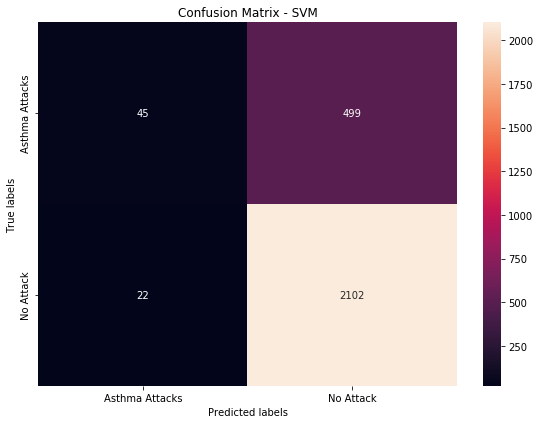

In [223]:
## Accuracy

plt.figure(figsize=(8, 6))
labels = ['Asthma Attacks', 'No Attack']
cm2 = confusion_matrix(y_test, y_pred4, labels=[1,0])
ax= plt.subplot()
sns.heatmap(cm2, annot=True,fmt='g', ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - SVM')
ax.xaxis.set_ticklabels(['Asthma Attacks', 'No Attack']) 
ax.yaxis.set_ticklabels(['Asthma Attacks', 'No Attack'],va='center')

plt.tight_layout()
plt.savefig('/rds/general/user/md2620/home/ML_project/Plots/Confusion_Matrix_SVM')
plt.show()

In [224]:
TP_svm = cm2[0,0]
TN_svm = cm2[1,1]
FP_svm = cm2[0,1]
FN_svm = cm2[1,0]

In [225]:
TRUE POSITIVE RATES

SyntaxError: invalid syntax (<ipython-input-225-933bbcf68761>, line 1)

In [226]:
true_positive_rate_svm = TP_svm / float(TP_svm + FN_svm)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate_svm))

True Positive Rate : 0.6716


FALSE POSITIVE RATES

In [227]:
false_positive_rate_svm = FP_svm / float(FP_svm + TN_svm)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate_svm))

False Positive Rate : 0.1918


PLOT ROC CURVE

In [228]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [230]:
#Keep probabilities of the positive class only
probs_svm = y_pred4['p1']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [231]:
#Compute AUC
from sklearn.metrics import roc_auc_score
auc_svm = roc_auc_score(y_test, svm_proba)
print('AUC: %.2f' % auc_svm)

AUC: 0.75


In [232]:
#Get ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svm_proba)

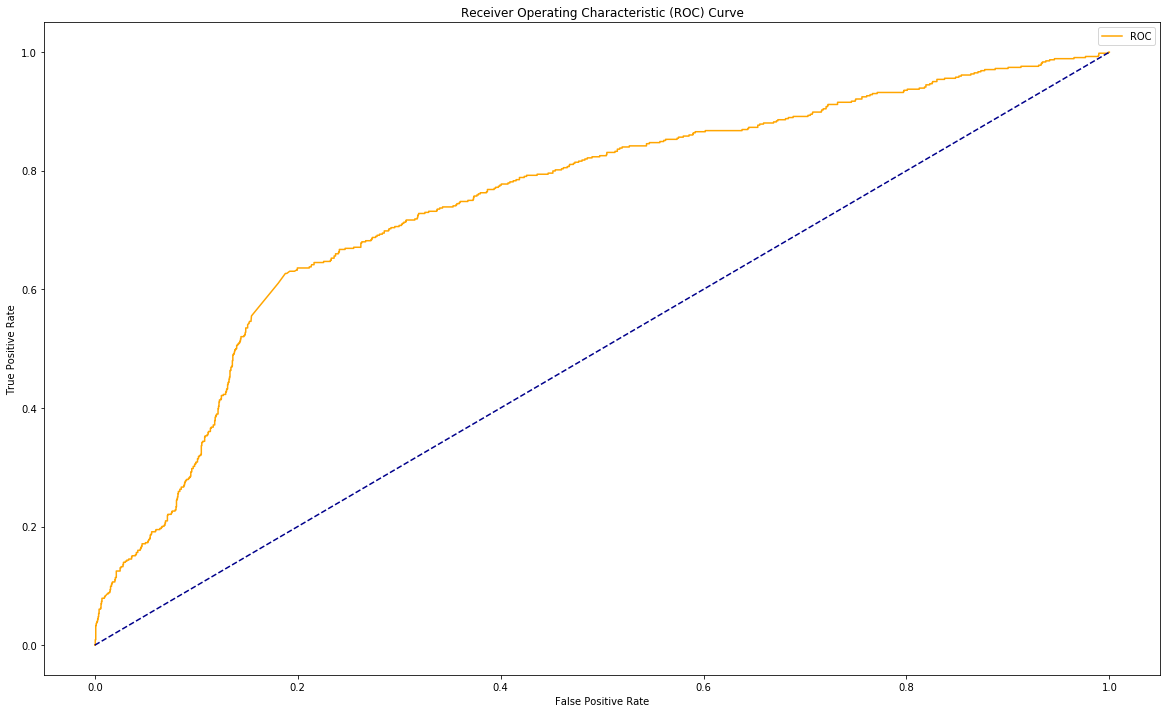

In [233]:
#print ROC curve
plot_roc_curve(fpr, tpr)

In [234]:
#Set svm results in the result table
results.loc['SVM', 'accuracy'] = accuracy_score(y_test, y_pred4)
results.loc['SVM', 'f1'] = f1_score(y_test, y_pred4)
results.loc['SVM', 'precision'] = precision_score(y_test, y_pred4)
results.loc['SVM', 'recall'] = recall_score(y_test, y_pred4)

In [235]:
#See results
results

,accuracy,f1,precision,recall
Random Forest,0.826837,0.540755,0.588745,0.5
Gradient Boost,0.830585,0.325373,0.865079,0.200368
SVM,0.804723,0.1473,0.671642,0.0827206


ROC CURVES FOR ALL MODELS

In [237]:
import matplotlib

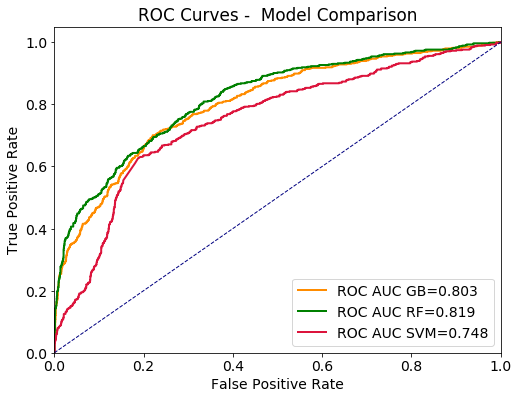

In [238]:
#Define function
def roc_curve_and_score(y_test, pred_proba):
    fpr, tpr, _ = roc_curve(y_test.ravel(), pred_proba.ravel())
    roc_auc = roc_auc_score(y_test.ravel(), pred_proba.ravel())
    return fpr, tpr, roc_auc

plt.figure(figsize=(8, 6))
matplotlib.rcParams.update({'font.size': 14})
plt.grid()
fpr, tpr, roc_auc = roc_curve_and_score(y_test, probs)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC AUC GB={0:.3f}'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, probs_rf)
plt.plot(fpr, tpr, color='green', lw=2,
         label='ROC AUC RF={0:.3f}'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, svm_proba)
plt.plot(fpr, tpr, color='crimson', lw=2,
         label='ROC AUC SVM={0:.3f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(False)
plt.title("ROC Curves -  Model Comparison")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('/rds/general/user/md2620/home/ML_project/Plots/ROC_all_models')
plt.show()

In [130]:
import matplotlib